<h1>Encodings for Next Step Activity Prediction</h1>
<br/>
<h5>Lorenzo Manuel Cirac Monteagudo</h5>
<h5>Supervisor: Ana Luisa Oliveira da Nobrega Costa</h5>
<h5>Chair: Information Systems</h5>
<h5>TUM School of Computation, Information and Technology</h5>
<br/>

<h3>Dataset Information</h3>
<p>Helpdesk dataset: <a href="https://github.com/ERamaM/PredictiveMonitoringDatasets/tree/master/raw_datasets">https://github.com/ERamaM/PredictiveMonitoringDatasets/tree/master/raw_datasets</a></p>
<p>This event log contains data of a ticketing management process
form an Italian software company</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pm4py.objects.conversion.log import converter as xes_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

log = xes_importer.apply("data/helpdesk")
df = xes_converter.apply(log, variant=xes_converter.Variants.TO_DATA_FRAME)

parsing log, completed traces ::   0%|          | 0/4580 [00:00<?, ?it/s]

<h3>Dataset Exploration</h3>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21348 entries, 0 to 21347
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   concept:name          21348 non-null  object             
 1   lifecycle:transition  21348 non-null  object             
 2   org:resource          21348 non-null  object             
 3   time:timestamp        21348 non-null  datetime64[ns, UTC]
 4   Activity              21348 non-null  object             
 5   Resource              21348 non-null  object             
 6   case:concept:name     21348 non-null  object             
 7   case:variant          21348 non-null  object             
 8   case:variant-index    21348 non-null  int64              
 9   case:creator          21348 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(8)
memory usage: 1.6+ MB


In [4]:
df.head()

,concept:name,lifecycle:transition,org:resource,time:timestamp,Activity,Resource,case:concept:name,case:variant,case:variant-index,case:creator
0,Assign seriousness,complete,Value 2,2010-01-13 08:40:25+00:00,Assign seriousness,Value 2,Case3608,Variant 33,33,Fluxicon Disco
1,Take in charge ticket,complete,Value 2,2010-01-29 08:52:27+00:00,Take in charge ticket,Value 2,Case3608,Variant 33,33,Fluxicon Disco
2,Resolve ticket,complete,Value 2,2010-01-29 08:52:34+00:00,Resolve ticket,Value 2,Case3608,Variant 33,33,Fluxicon Disco
3,Closed,complete,Value 5,2010-02-13 08:52:48+00:00,Closed,Value 5,Case3608,Variant 33,33,Fluxicon Disco
4,Closed,complete,Value 5,2010-02-13 08:52:48+00:00,Closed,Value 5,Case3608,Variant 33,33,Fluxicon Disco


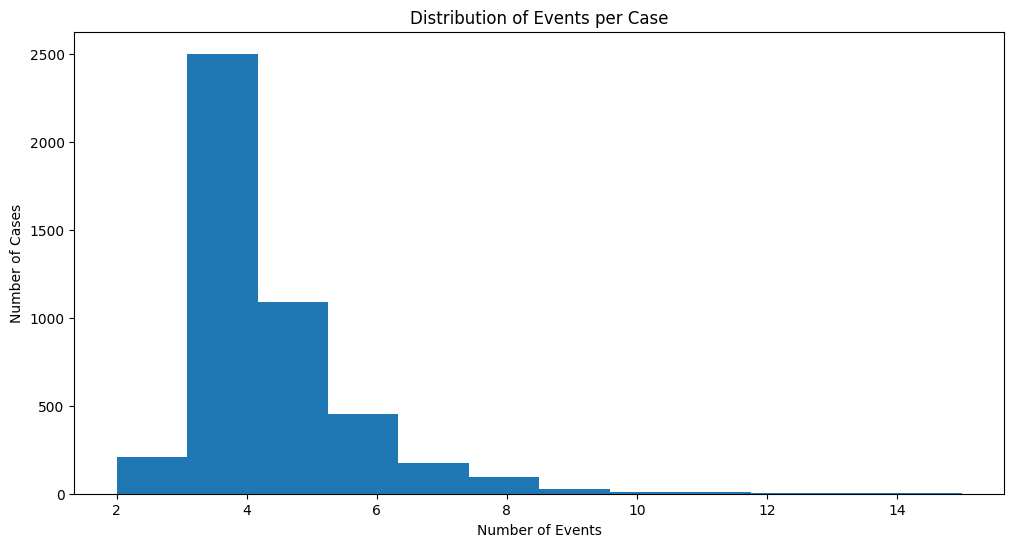

In [5]:
case_lengths = df.groupby("case:concept:name").size()

plt.figure(figsize = (12, 6))
plt.hist(case_lengths, bins = 12)
plt.title("Distribution of Events per Case")
plt.xlabel("Number of Events")
plt.ylabel("Number of Cases")
plt.show()

<h3>Feature Selection</h3>

In [6]:
# Feature Selection
df = df.rename(columns = {
    "concept:name": "activity",
    "org:resource": "resource",
    "time:timestamp": "timestamp",
    "case:concept:name": "case_id",
})
df = df[["case_id", "activity", "resource", "timestamp"]].sort_values(by = ["case_id", "timestamp"])

# Label Column
df["next_activity"] = df.groupby("case_id")["activity"].shift(-1)
df = df[df["next_activity"].notna()]

In [7]:
df.head(20)

,case_id,activity,resource,timestamp,next_activity
17612,Case1,Assign seriousness,Value 1,2012-10-09 14:50:17+00:00,Take in charge ticket
17613,Case1,Take in charge ticket,Value 1,2012-10-09 14:51:01+00:00,Take in charge ticket
17614,Case1,Take in charge ticket,Value 2,2012-10-12 15:02:56+00:00,Resolve ticket
17615,Case1,Resolve ticket,Value 1,2012-10-25 11:54:26+00:00,Closed
212,Case10,Assign seriousness,Value 2,2010-02-10 08:50:20+00:00,Take in charge ticket
213,Case10,Take in charge ticket,Value 2,2010-03-19 08:47:06+00:00,Resolve ticket
214,Case10,Resolve ticket,Value 2,2010-03-19 08:47:13+00:00,Closed
19330,Case100,Assign seriousness,Value 1,2013-04-12 10:25:17+00:00,Take in charge ticket
19331,Case100,Take in charge ticket,Value 9,2013-04-24 10:24:01+00:00,Require upgrade
19332,Case100,Require upgrade,Value 9,2013-04-24 15:51:11+00:00,Resolve ticket


<h3>Train & Test Data Split</h3>

In [8]:
from sklearn.model_selection import train_test_split

unique_cases = df["case_id"].unique()
train_cases, test_cases = train_test_split(unique_cases, test_size = 0.2, random_state = 2025)

train_df = df[df["case_id"].isin(train_cases)]
test_df = df[df["case_id"].isin(test_cases)]

<h3>Encodings</h3>

<h5>One Hot Encoding</h5>

In [9]:
def one_hot_encoding(data, cols):
    encoded_df = data.copy()
    
    for col in cols:
        dummies = pd.get_dummies(encoded_df[col], prefix=col)
        encoded_df = pd.concat([encoded_df.drop(columns=[col]), dummies], axis=1)
    return encoded_df

<h5>Last State Encoding</h5>

In [10]:
def last_state_encoding(data):
    

SyntaxError: expected ':' (313013486.py, line 1)